In [12]:
from sklearn import svm,datasets,metrics
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc , plot_roc_curve,confusion_matrix,f1_score

dataAll = pd.read_csv("eyedata.csv")
print(dataAll)



           CDr      CDd  eye
0     0.434850  16388.5    0
1     0.373750  21204.5    0
2     0.440787  13436.5    0
3     0.310186  20006.0    0
4     0.292335   6550.5    0
...        ...      ...  ...
1849  0.128330  12759.5    2
1850  0.196985  12837.0    2
1851  0.308003   4717.0    2
1852  0.234785   7776.5    2
1853  0.269728   3475.0    2

[1854 rows x 3 columns]


Text(0, 0.5, 'y')

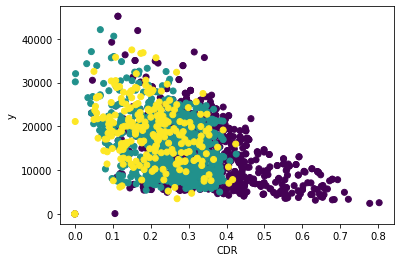

In [2]:
cdr = np.reshape(dataAll.CDr.values,(-1,1))
cdd = np.reshape(dataAll.CDd.values,(-1,1))
data = np.hstack([cdr,cdd])
eye = dataAll.drop(['CDr','CDd'],axis=1).eye.values

trainData01,testData01,trainType01,testType01 = train_test_split(data, eye, test_size=0.2 , random_state=1)
skf = StratifiedKFold(n_splits=5)

plt.scatter(data[:,0],data[:,1], c=eye)
plt.xlabel('CDR')
plt.ylabel('y')


In [6]:
clf = QuadraticDiscriminantAnalysis()
i = 1

for train_index, test_index in skf.split(trainData01, trainType01):
    x_train, x_test = trainData01[train_index], trainData01[test_index]
    y_train, y_test = trainType01[train_index], trainType01[test_index]
    clf.fit(x_train,y_train)
    filename = 'savemodel/QDA_model'+str(i)+'.sav'
    joblib.dump(clf,filename)

    i+=1

loaded_model = joblib.load('savemodel/QDA_model5.sav')

conf_matrix = confusion_matrix(testType01,loaded_model.predict(testData01))
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Specificity = TN/(TN+FP)
sensitivity = TP / (TP + FN)
Precision = TP / (TP + FP)
print('Accuracy:',Accuracy)
print('Specificity',Specificity)
print('sensitivity:',sensitivity)
print('Precision:',Precision)
print('F1 score',f1_score(testType01,loaded_model.predict(testData01), average='micro'),'\n')
print('FP',FP)
print('FN',FN)
print('TP',TP)
print('TN',TN,'\n')



Accuracy: 0.670926517571885
Specificity 0.6795580110497238
sensitivity: 0.6590909090909091
Precision: 0.6
F1 score 0.5741239892183289 

FP 58
FN 45
TP 87
TN 123 



In [20]:
rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
i = 1

for train_index, test_index in skf.split(trainData01, trainType01):
    x_train, x_test = trainData01[train_index], trainData01[test_index]
    y_train, y_test = trainType01[train_index], trainType01[test_index]
    rbf.fit(x_train,y_train)
    filename = 'savemodel/RBF_model'+str(i)+'.sav'
    joblib.dump(rbf,filename)

    i+=1

loaded_model = joblib.load('savemodel/RBF_model2.sav')

conf_matrix = confusion_matrix(testType01,loaded_model.predict(testData01))
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Specificity = TN/(TN+FP)
sensitivity = TP / (TP + FN)
Precision = TP / (TP + FP)
print('Accuracy:',Accuracy)
print('Specificity',Specificity)
print('sensitivity:',sensitivity)
print('Precision:',Precision)
print('F1 score',f1_score(testType01,loaded_model.predict(testData01), average='micro'),'\n')
print('FP',FP)
print('FN',FN)
print('TP',TP)
print('TN',TN,'\n')

print(loaded_model.predict_proba([[4.91426432e-01,6.79200000e+03]]))


Accuracy: 0.7142857142857143
Specificity 0.7513513513513513
sensitivity: 0.6642335766423357
Precision: 0.6642335766423357
F1 score 0.6199460916442049 

FP 46
FN 46
TP 91
TN 139 

[[0.83593473 0.08114727 0.082918  ]]
